## CorticalLabs Bulk Run with Method 1

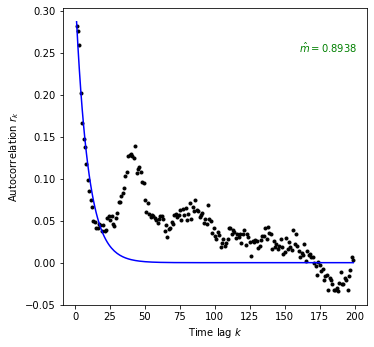

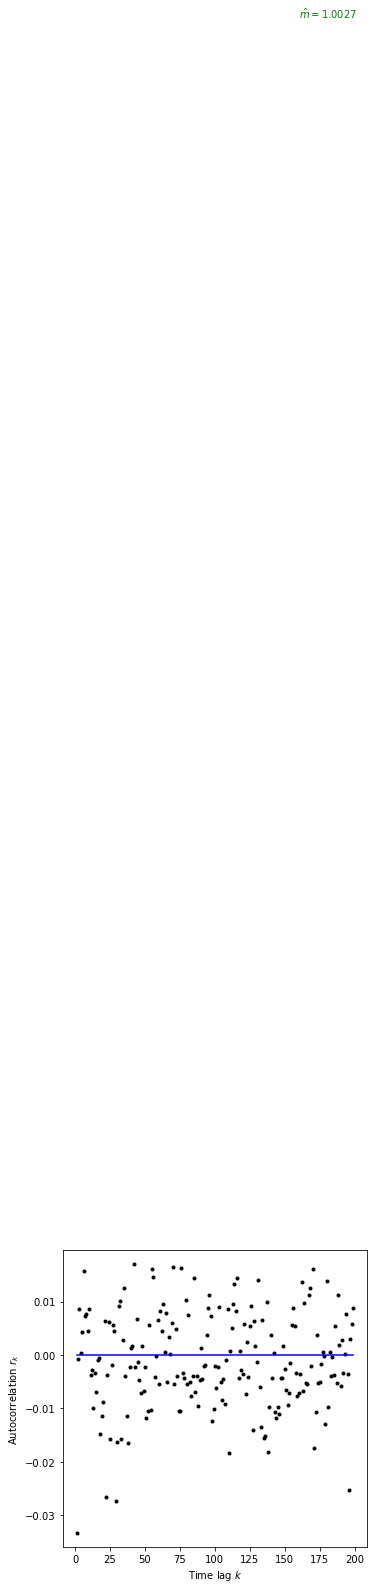

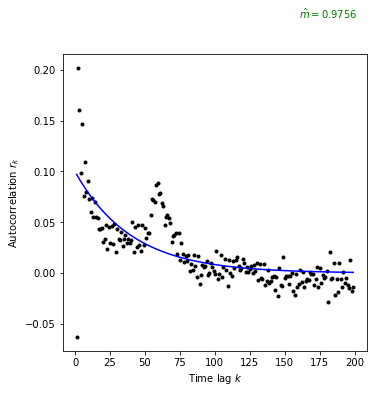

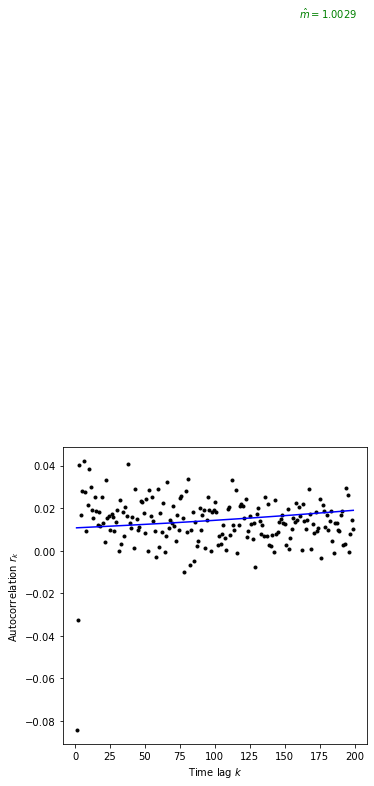

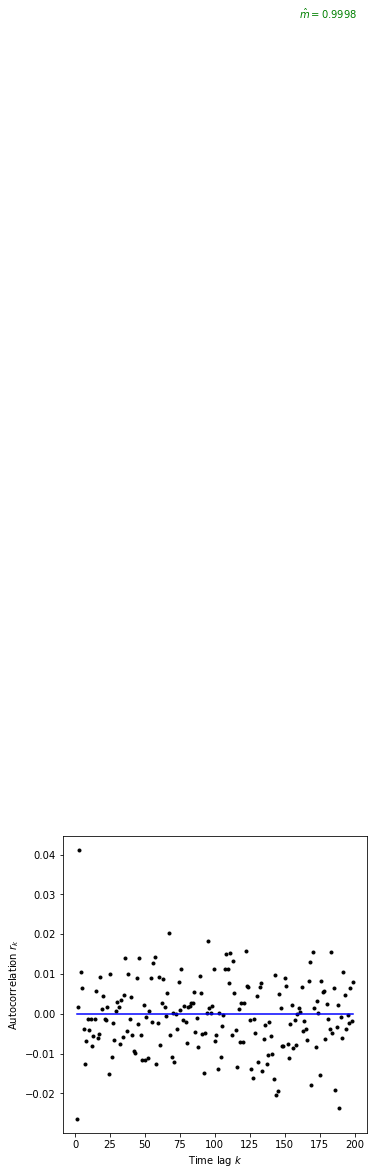

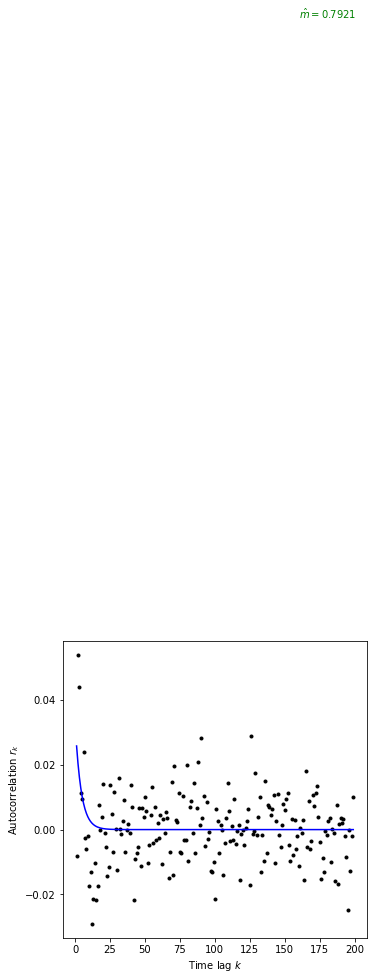

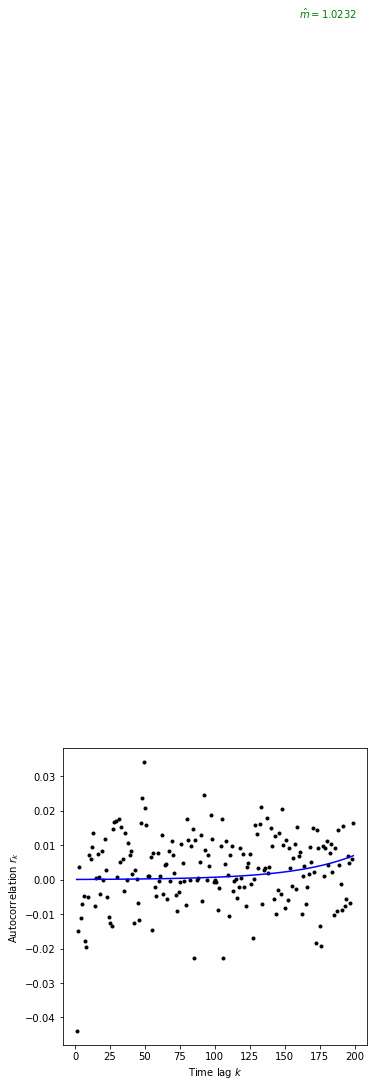

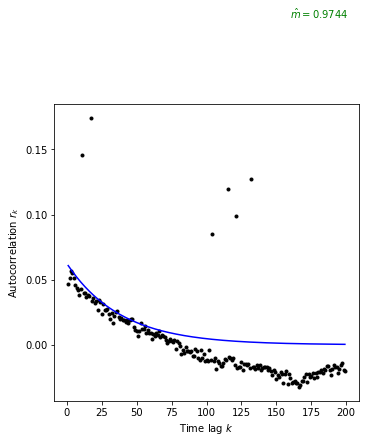

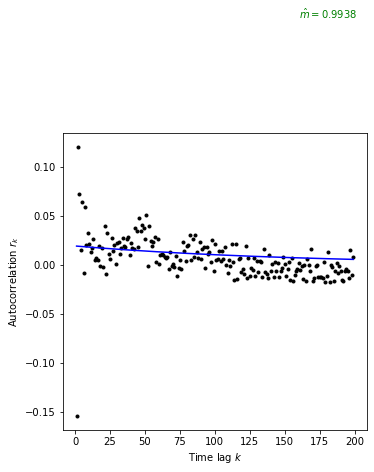

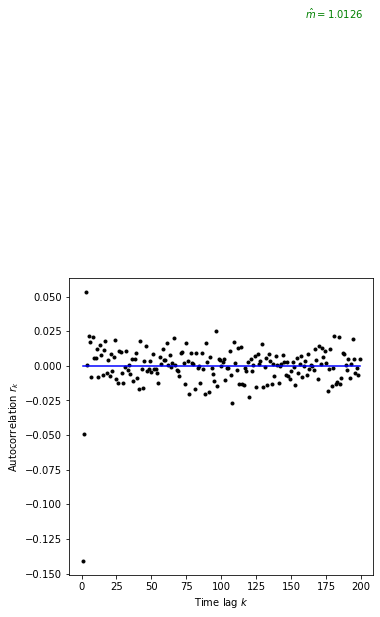

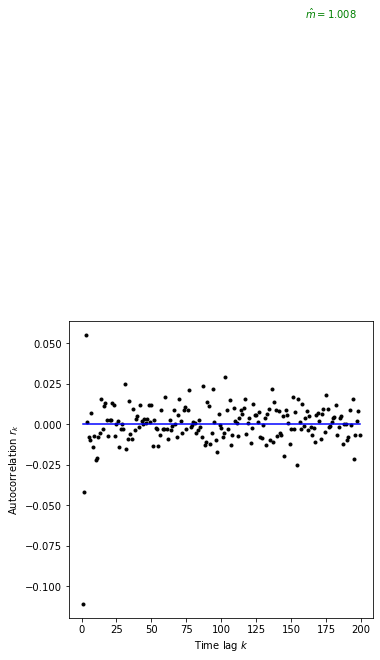

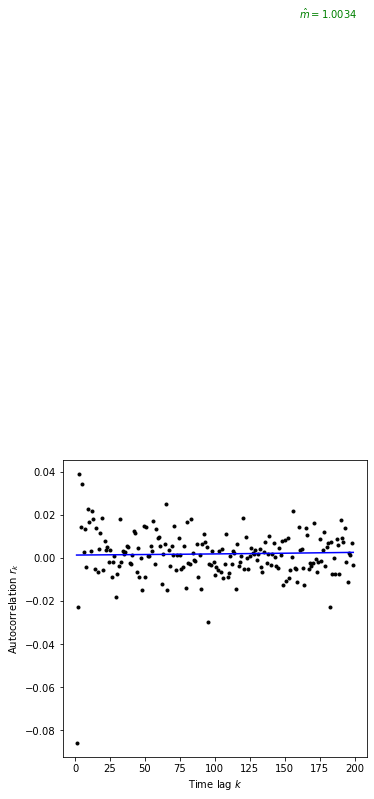

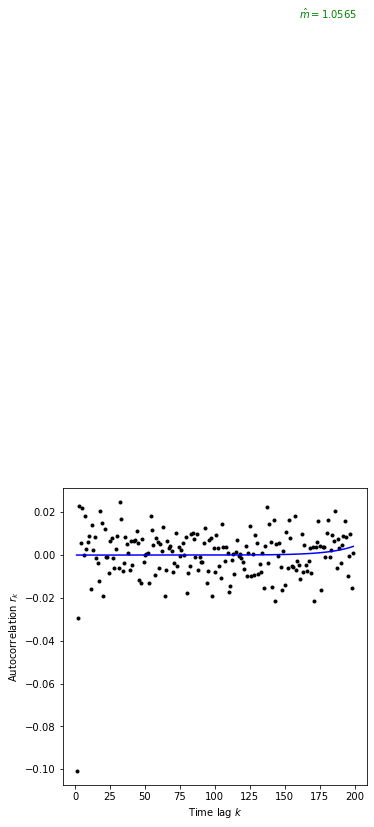

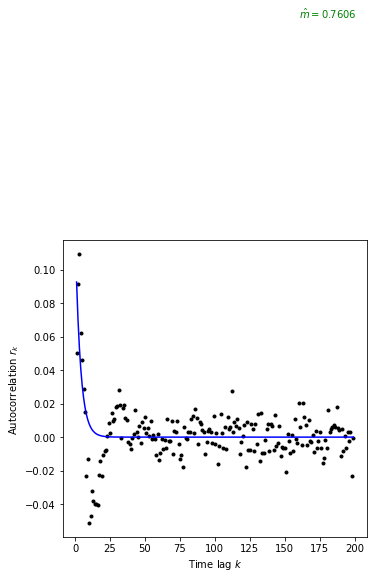

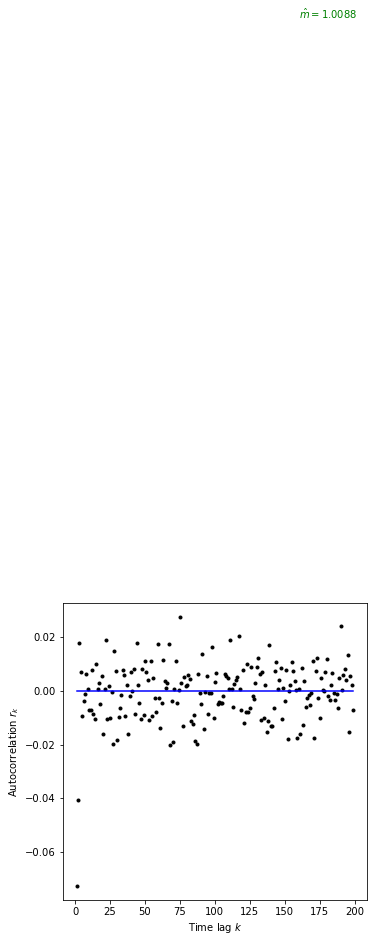

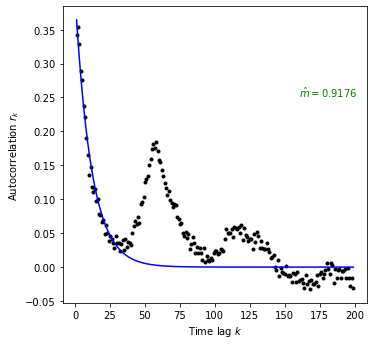

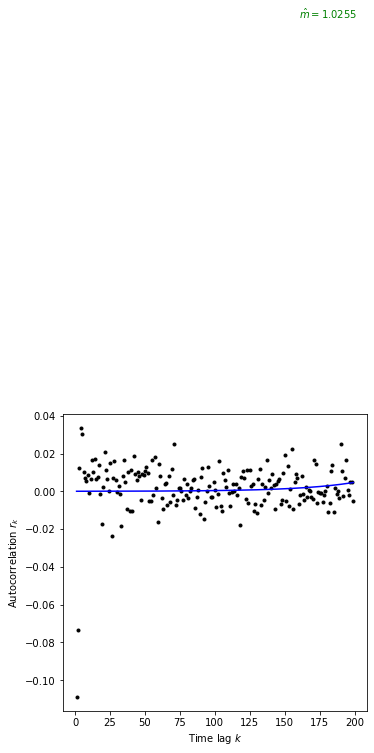

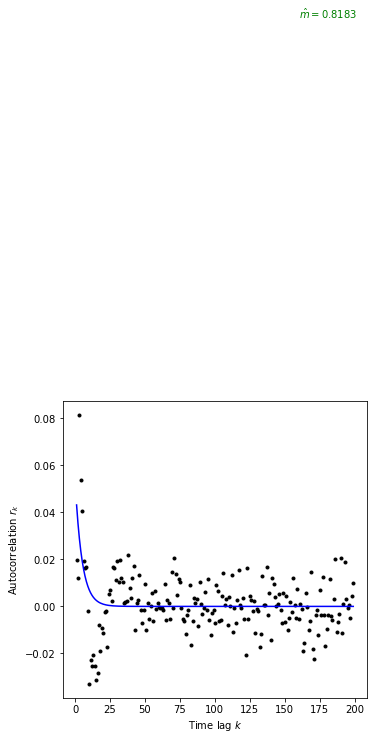

/home/jovyan/work/Forough/WiltingPriesemann2018_master/WiltingPriesemann.py:199: RuntimeWarning: invalid value encountered in log
  return_dict['autocorrelationtime'] = - 1.0 / np.log(p_opt[1])


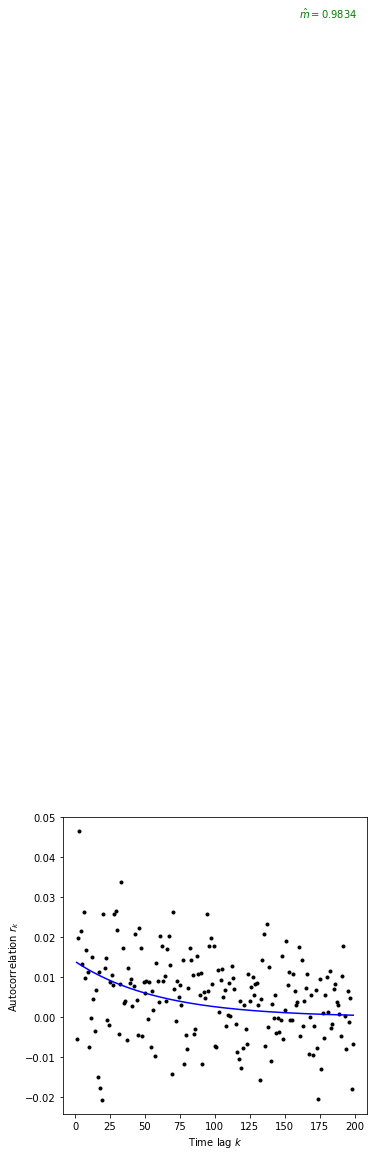

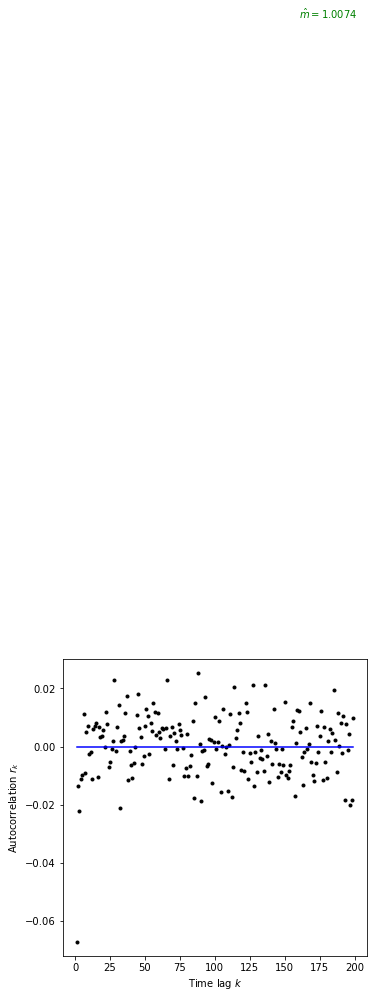

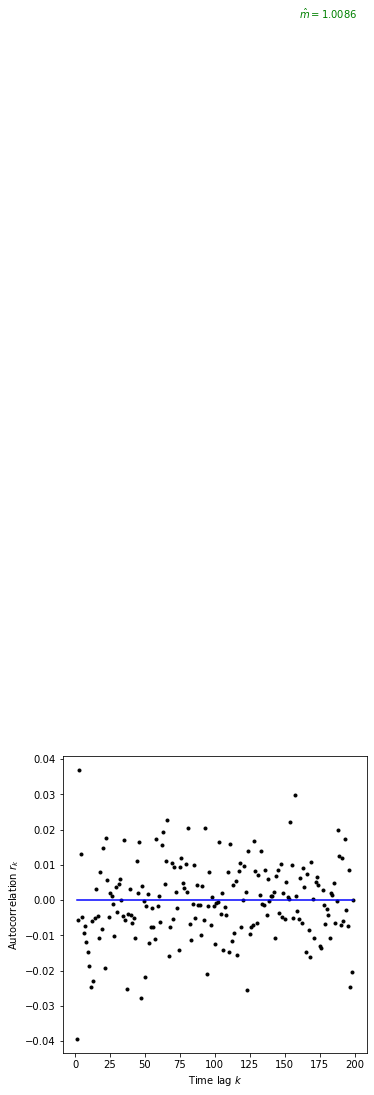

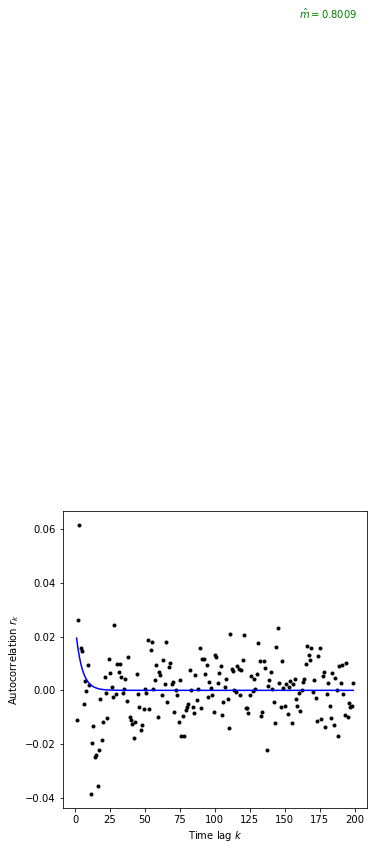

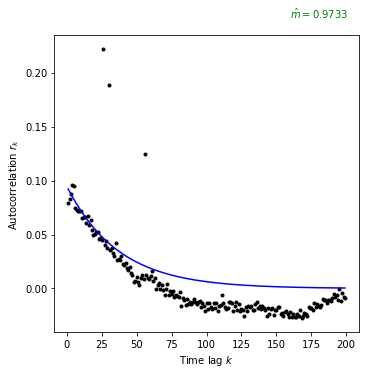

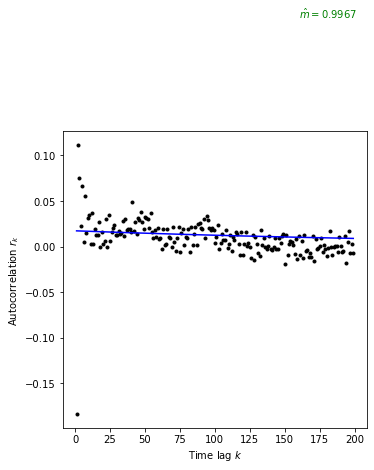

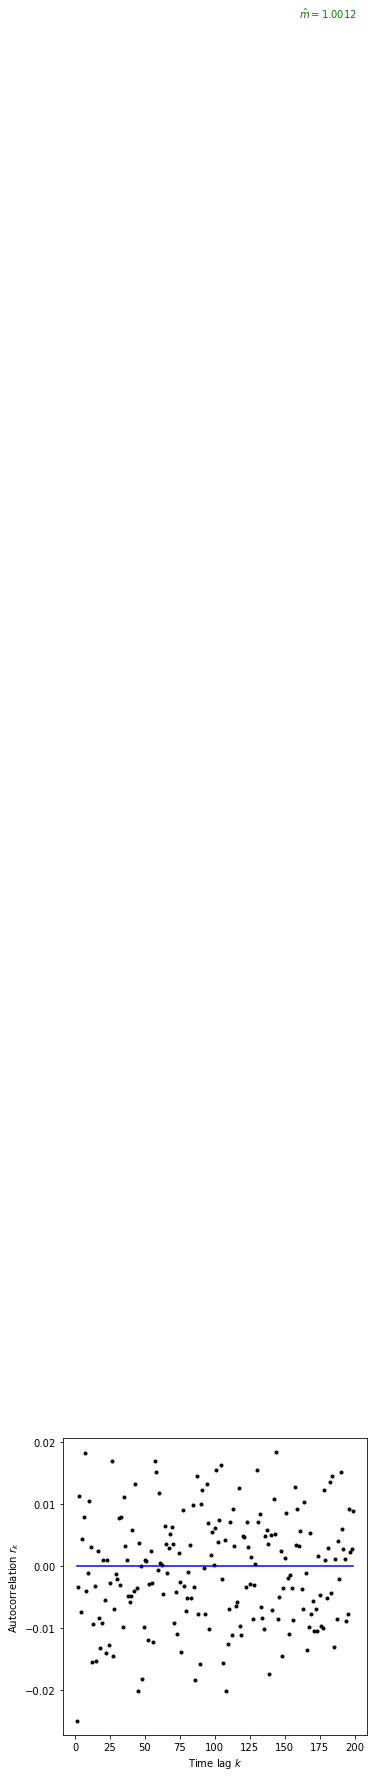

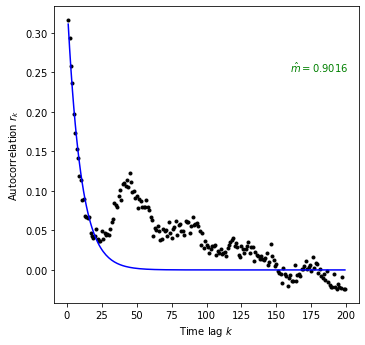

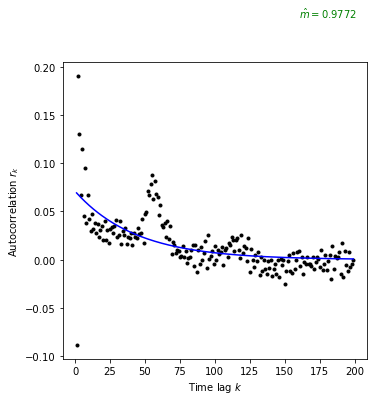

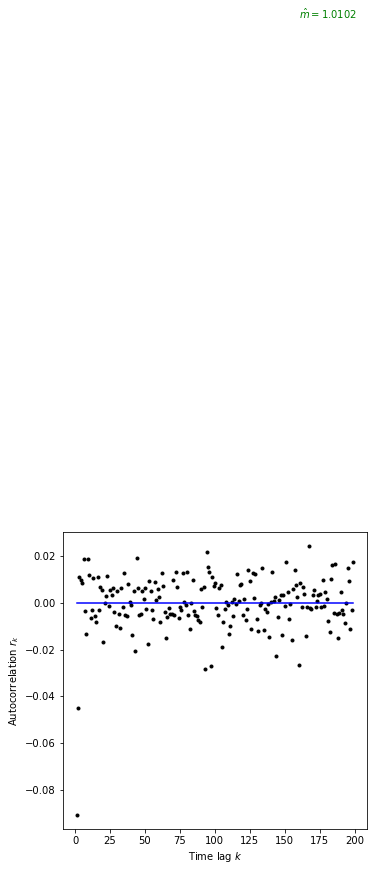

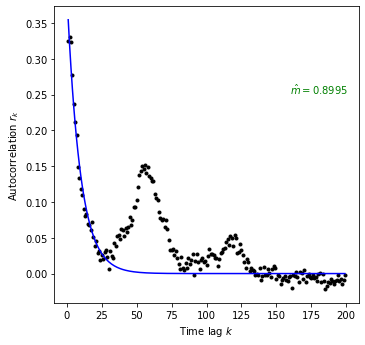

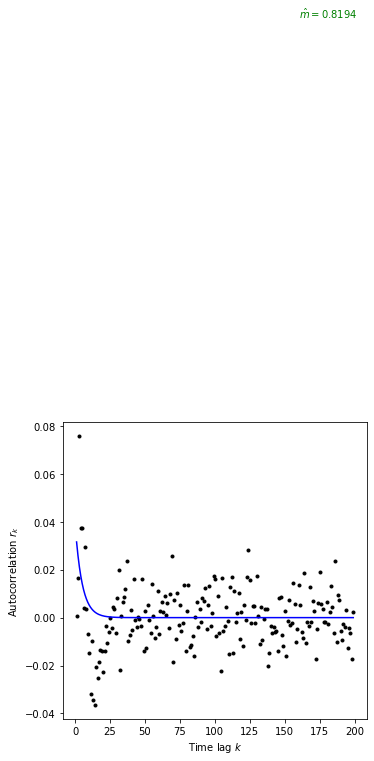

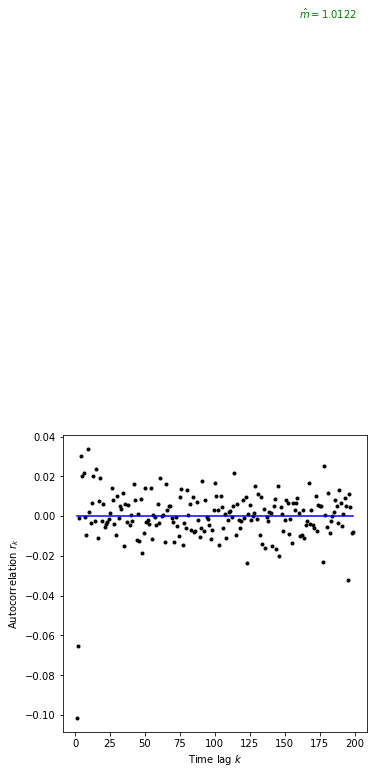

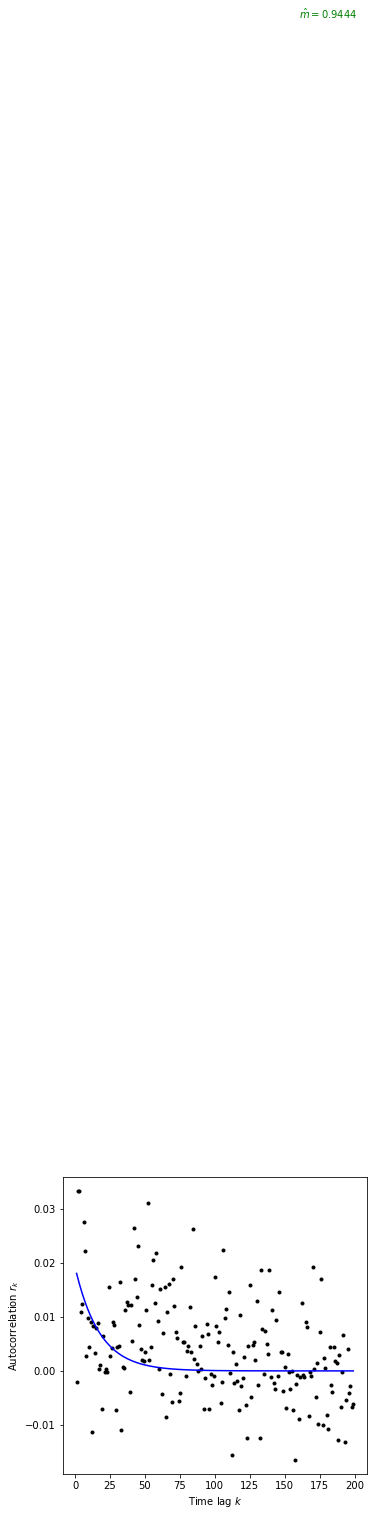

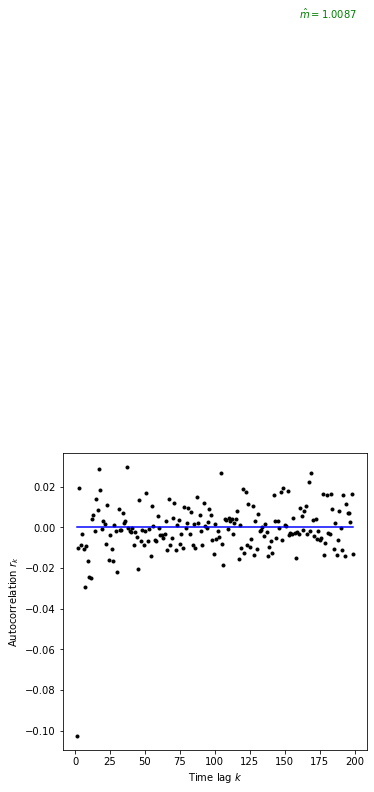

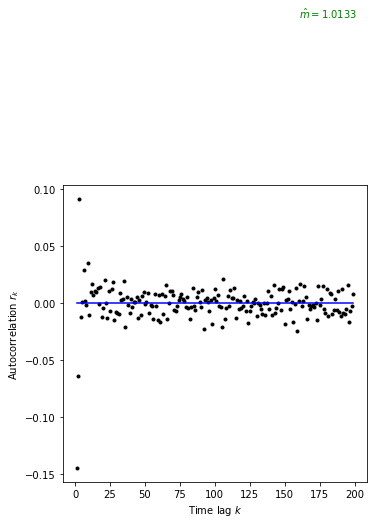

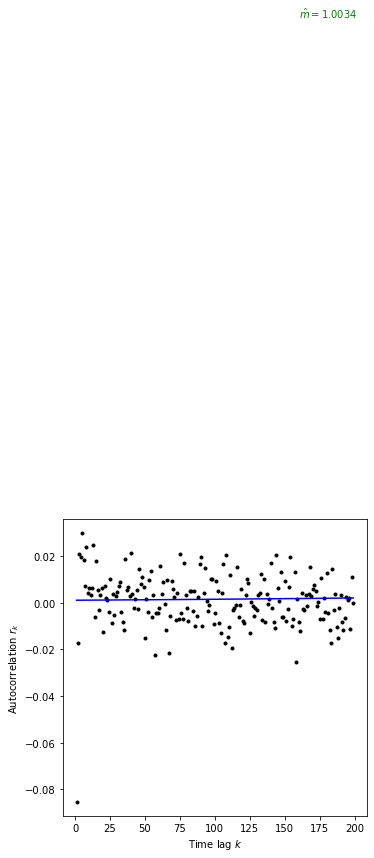

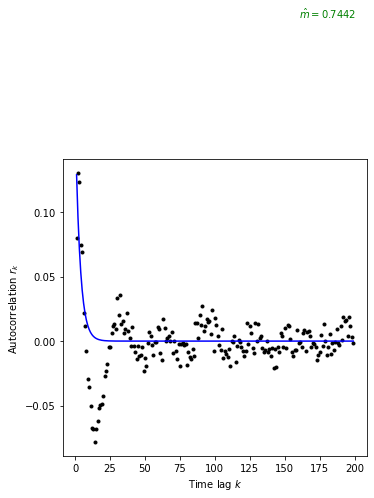

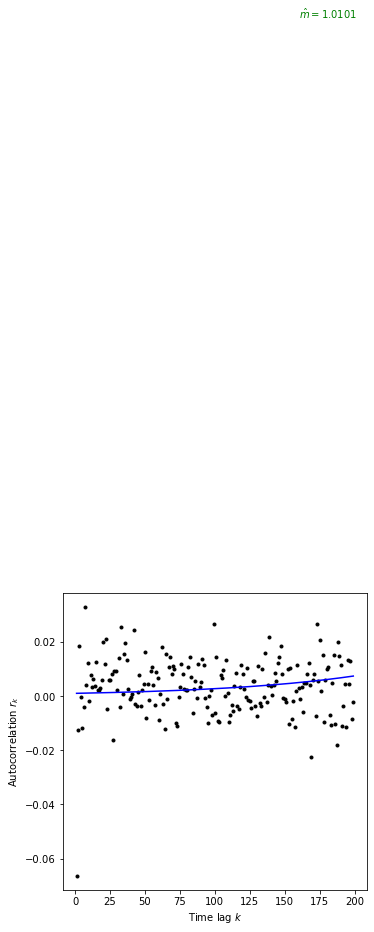

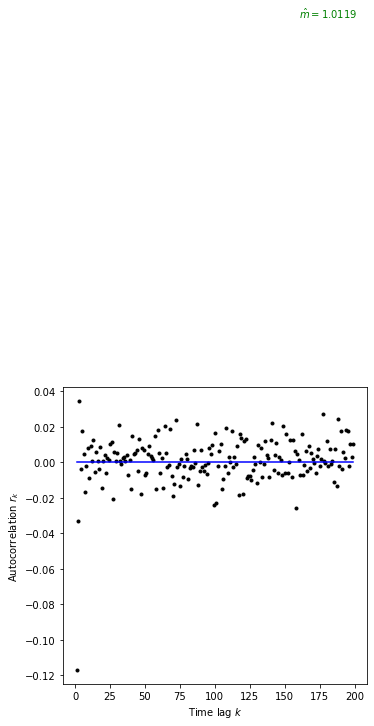

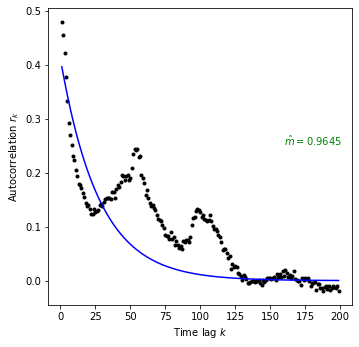

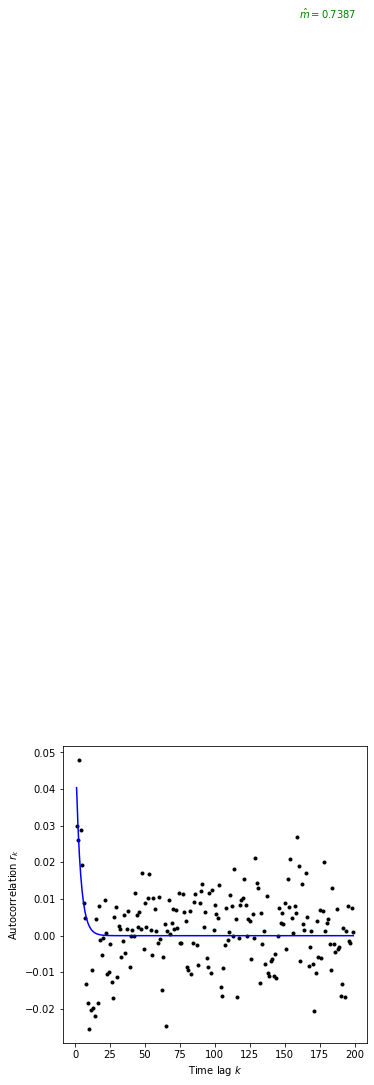

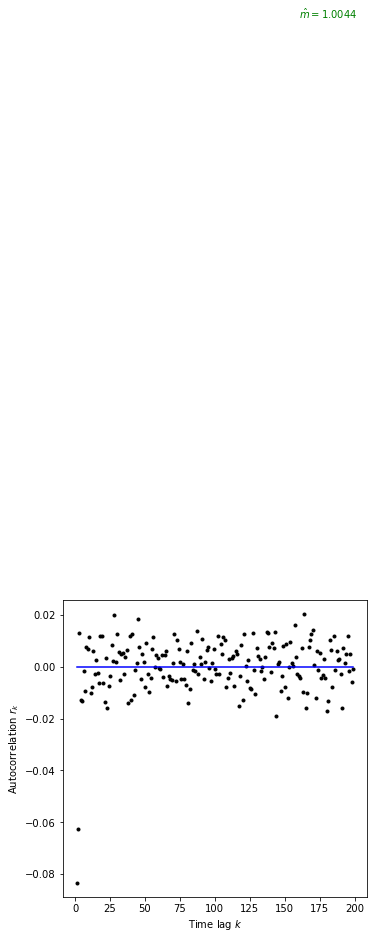

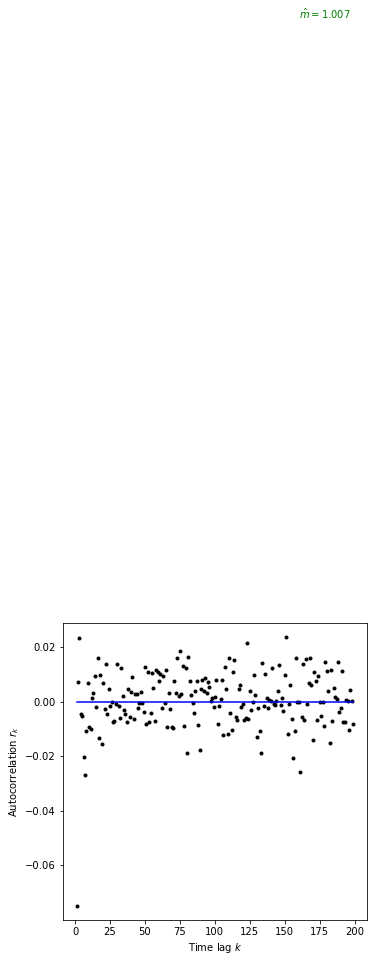

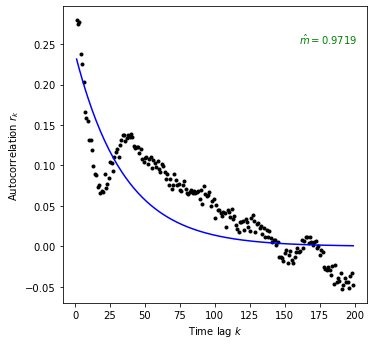

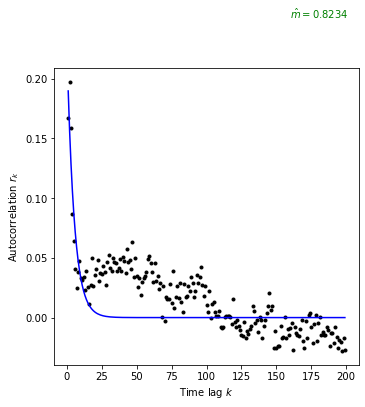

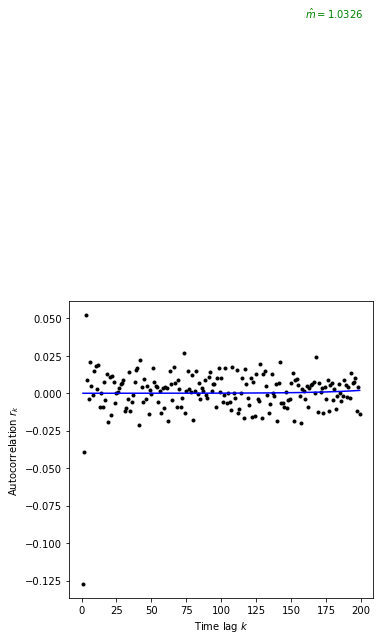

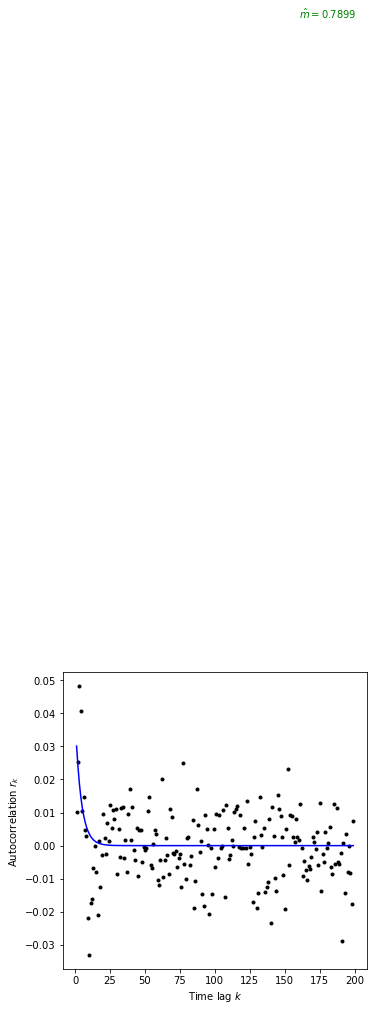

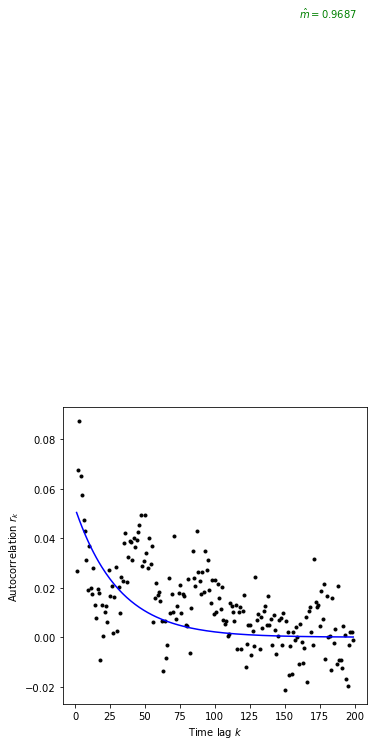

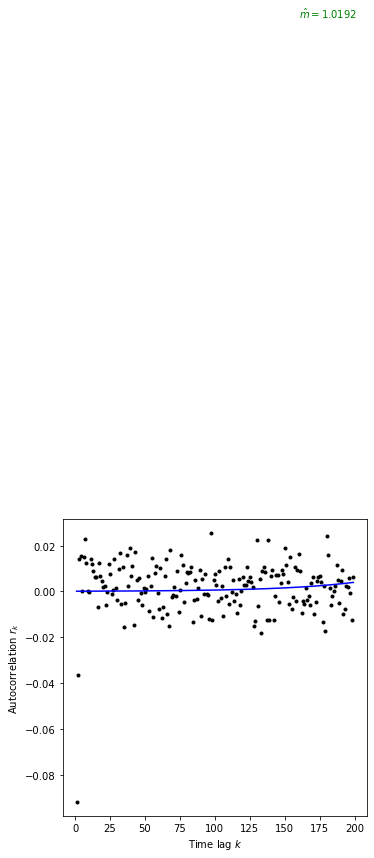

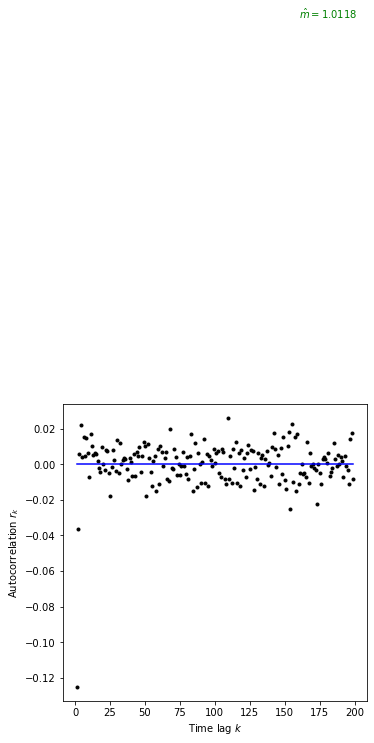

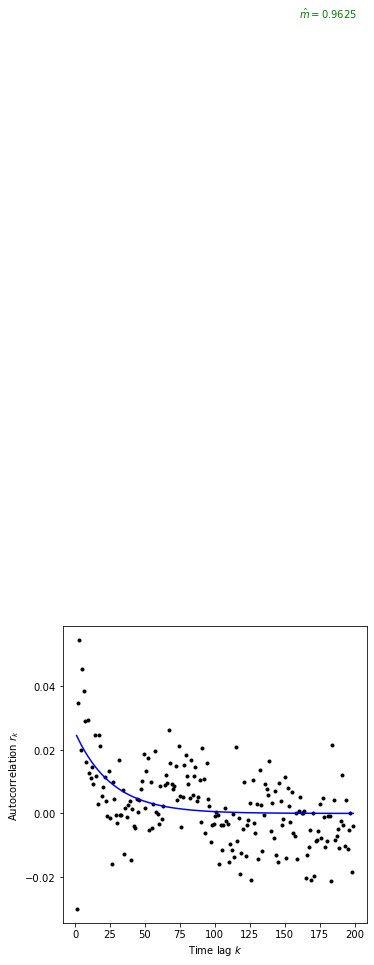

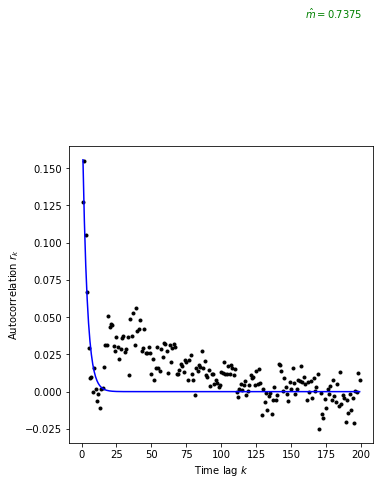

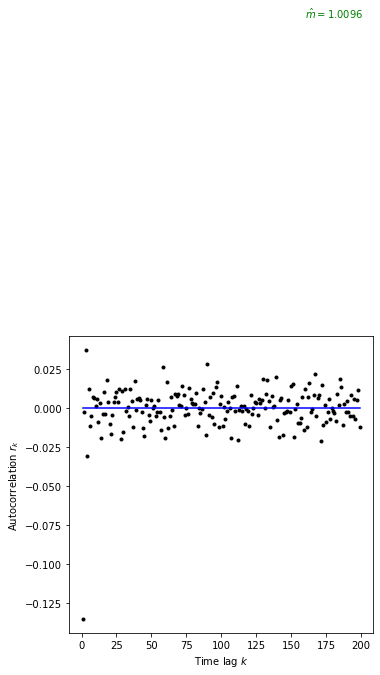

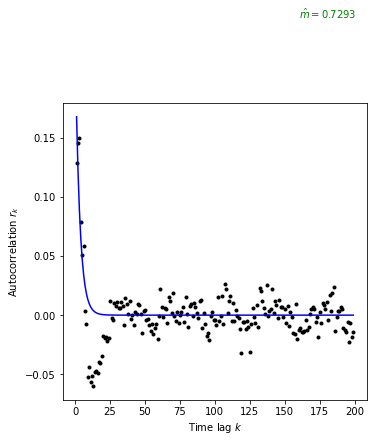

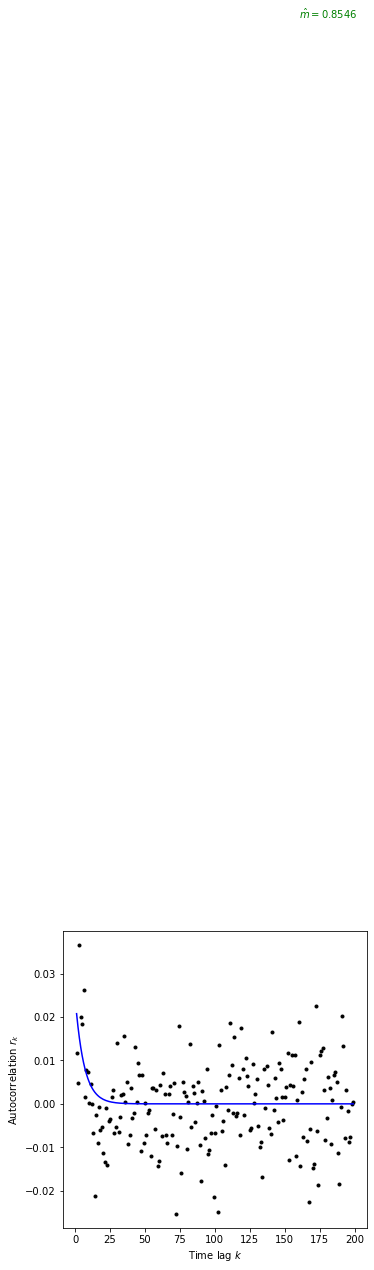

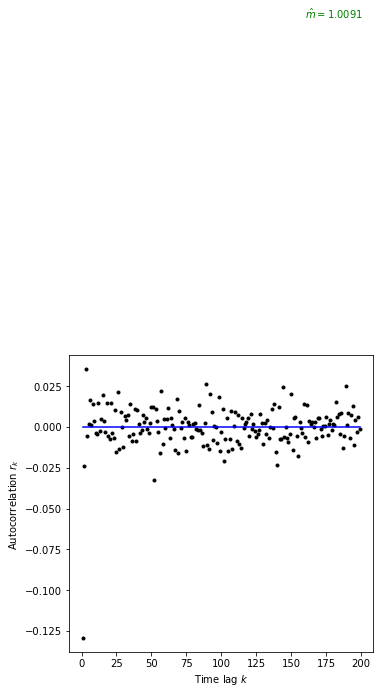

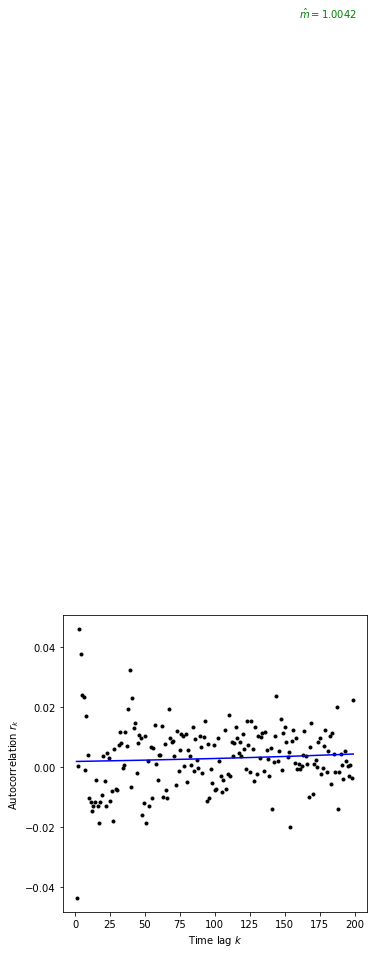

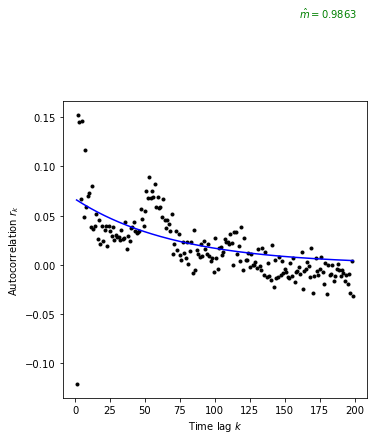

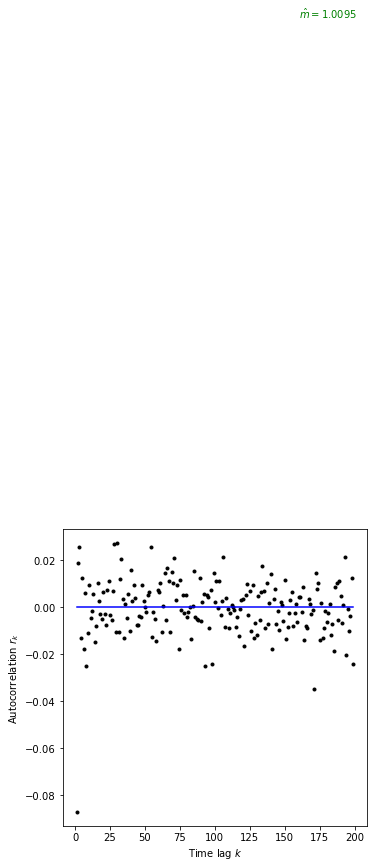

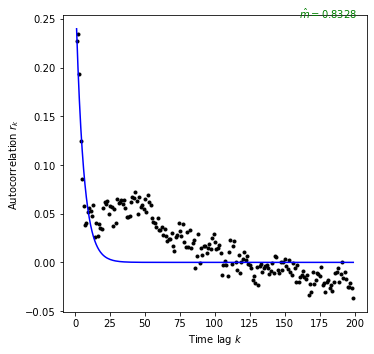

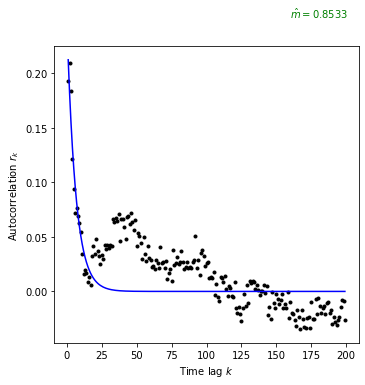

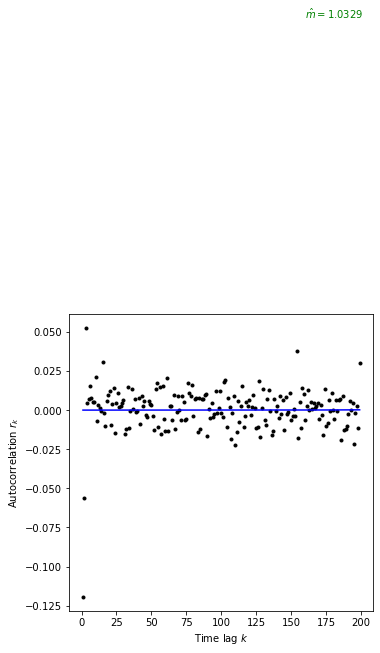

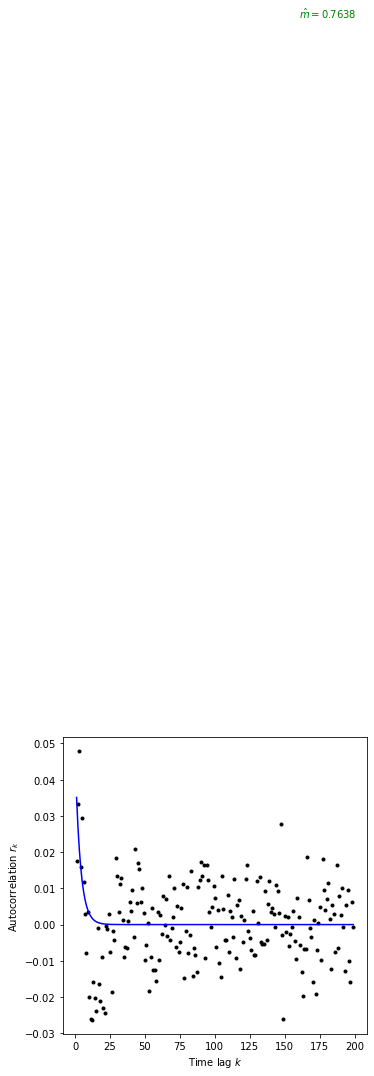

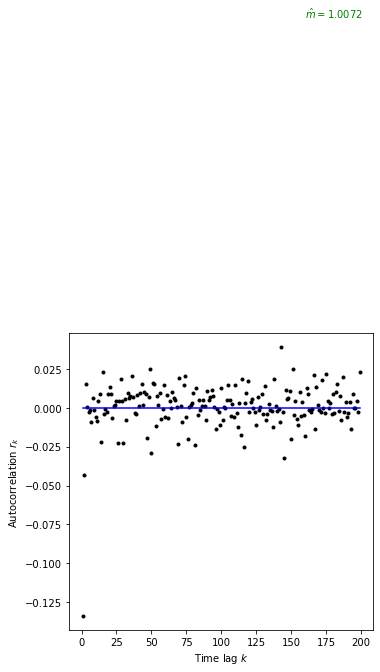

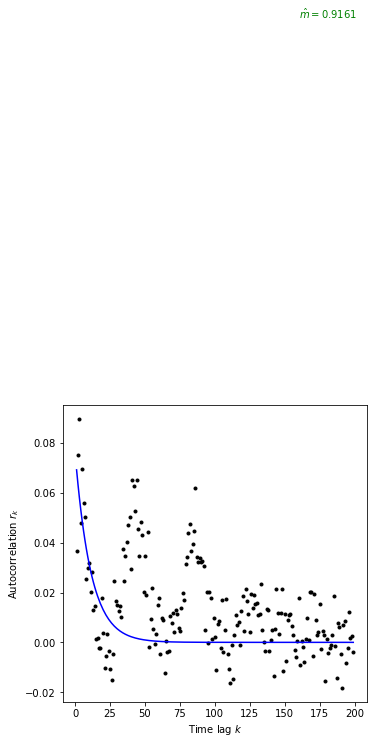

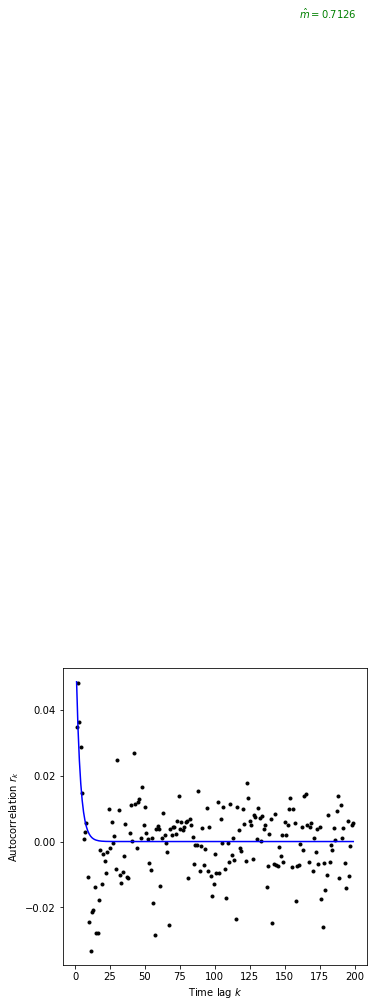

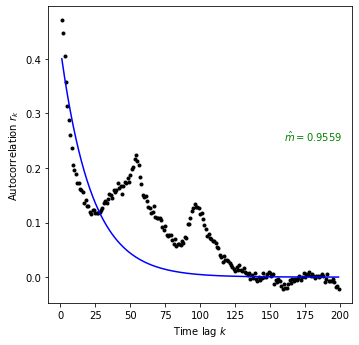

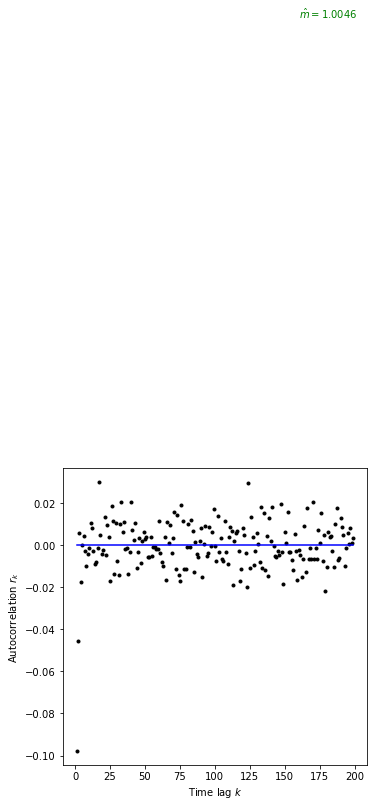

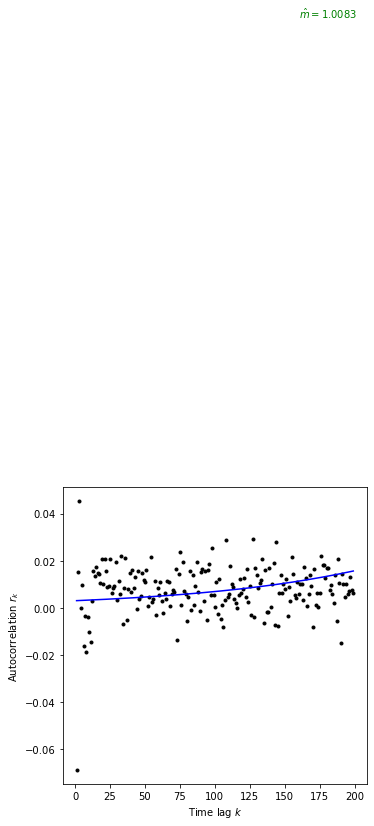

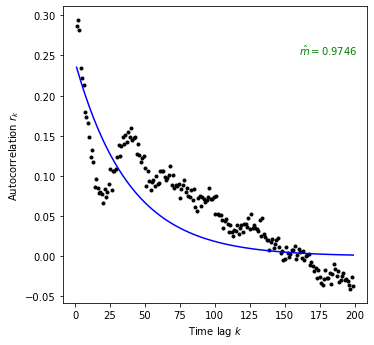

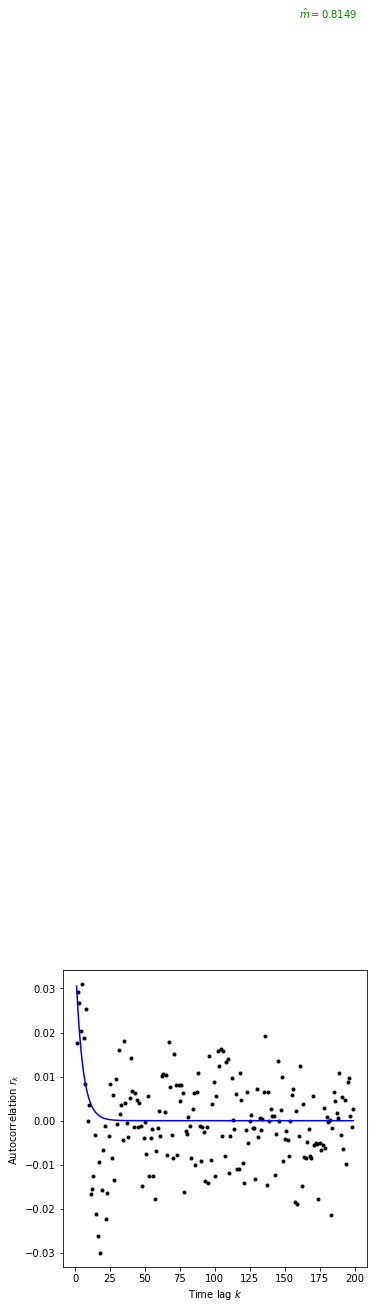

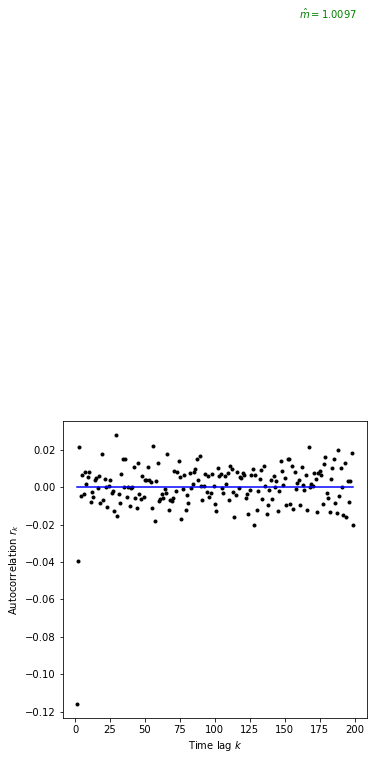

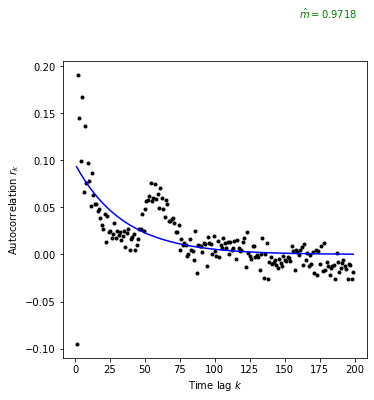

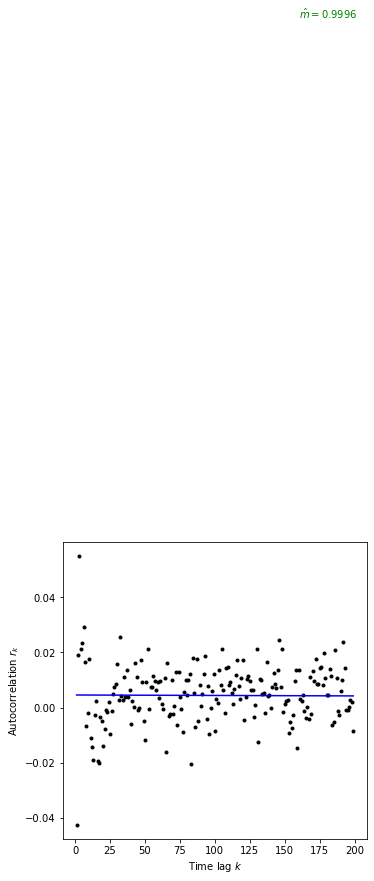

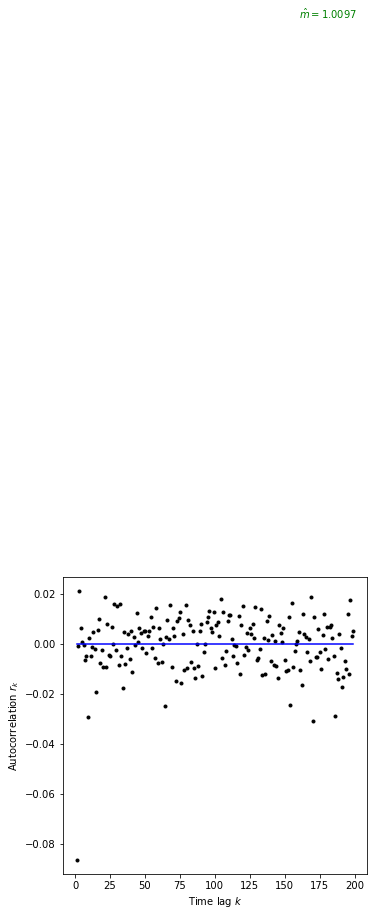

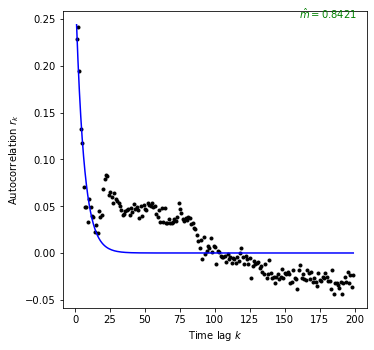

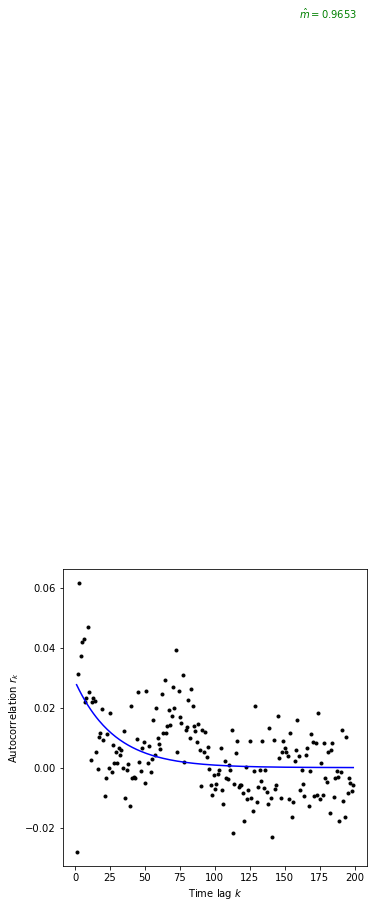

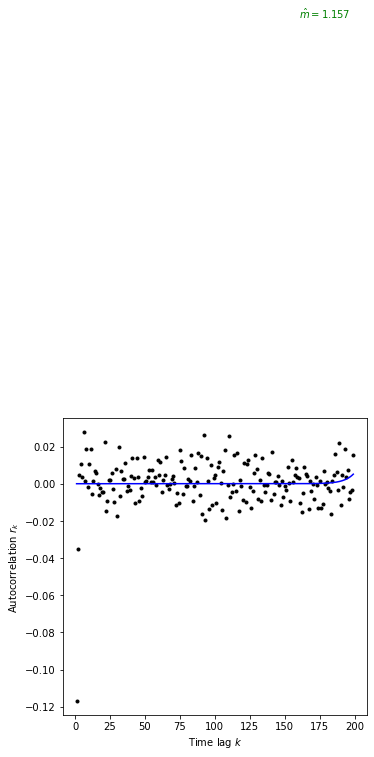

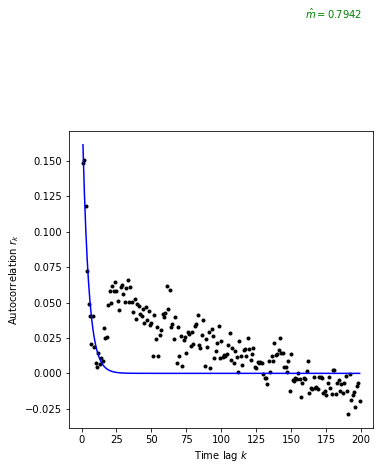

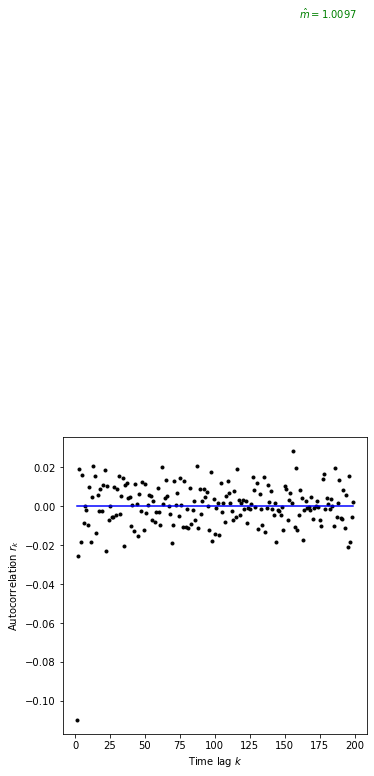

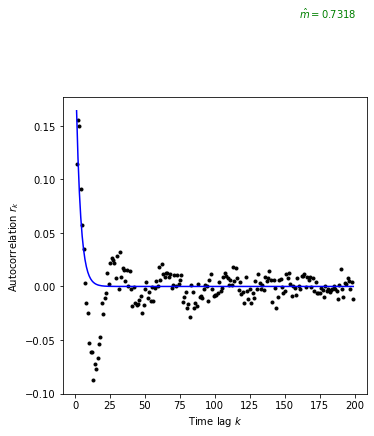

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys


import WiltingPriesemann as WP
import pylab as plt
import pandas as pd
import pickle

## Define parameters
## All variable names as in Wilting & Priesemann, 2018
## length = 10000
m = 0.98
## activity = 100
k_max = 500  # For the results set to: 500
alpha = 0.01


for dirs in [5]:#0,1,2,3,4,5,6]:
    if dirs ==0:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/Control(Media Only)_sessions'
    elif dirs ==1:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/NormalFeedback_sessions/Active_sessions'
    elif dirs ==2:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/NormalFeedback_sessions/Rest_sessions'
    elif dirs ==3:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/OpenLoop_sessions/Rest_sessions'
    elif dirs ==4:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/OpenLoop_sessions/Active_sessions'
    elif dirs ==5:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/SilentFeedback_sessions/Rest_sessions'
    elif dirs ==6:
        dir = '../SpikesAvalanches/CorticalLabs/FeedbackConditions_July2021/SilentFeedback_sessions/Active_sessions'


 
    BR_ratio =[]
    chip=[]
    date =[]
    session_num =[]

    import os
    arrays = {}
    df = pd.DataFrame()

    for filename in os.listdir(dir):
        try: 
            if ( (filename.endswith('.npy')) & ('11613' not in filename) & ('11623' not in filename)& ('11618' not in filename)
               & ('11597' not in filename)& ('7890' not in filename) & ('8790' not in filename)& ('7278' not in filename)& ('7282a' not in filename) & ('003' not in filename)):
     
                arrays[filename] = np.load(os.path.join(dir, filename))
                data = arrays[filename]
  
                ## Decided this is the right way to do it:
                ## To compute BRratio on the count of active neurons instead of overall avalnche size in each time bin, uncomment:
                data =np.count_nonzero(data, axis=0).tolist()
                np.set_printoptions(threshold=1000)
                A_t = data
                ## To compute BRratio on the count of active neurons instead of overall avalnche size in each time bin, uncomment:
                A_t = np.asarray(A_t)
                ## Emulate subsampling
                a_t = WP.simulate_binomial_subsampling(A_t, alpha)

                ## Perform MR estimation
                mr_A = WP.MR_estimation(A_t, k_max)
                mr_a = WP.MR_estimation(a_t, k_max)

                
                #### Plot results
                fig = plt.figure(figsize=(12,12))
                # ax1 = fig.add_subplot(221)
                ax2 = fig.add_subplot(222)
                

                ax2.plot(mr_A['k'], mr_A['r_k'], '.k', label=r'Data')
                ax2.plot(mr_A['k'], mr_A['fitfunc'](mr_A['k'], *mr_A['p_opt']), '-b', label=r'MR estimation')
                # ax2.text(3, mr_A['r_k'][0], r'$\hat{m}_\mathrm{C}=' + str(round(mr_A['naive_branching_ratio'],4)) + r'$', ha='left', va='center', color ='r')
                ax2.text(int((k_max / 2) + 2), mr_A['r_k'][int(k_max / 2)], r'$\hat{m}=' + str(round(mr_A['branching_ratio'],4)) + r'$', position = ((k_max-k_max/5),0.25), color='g')
                ax2.set_xlabel(r'Time lag $k$')
                ax2.set_ylabel(r'Autocorrelation $r_k$')


                if dirs ==0:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_Ctl_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                    
                elif dirs ==1:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_NormalF_Act_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                    
                elif dirs ==2:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_NormalF_Rest_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                
                 
                                    
                elif dirs ==3:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_OpenLoopF_Rest_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                
                elif dirs ==4:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_OpenLoopF_Act_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
         
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                    
                elif dirs ==5:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_SilentF_Rest_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                
                elif dirs ==6:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_FeedbackConditions_July2021/'+'BRratio_SilentF_Act_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
         
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                 
                  
                plt.show()

        except:
            pass
        
    df['chip_id'] = chip
    df['session_num'] =session_num
    df['date'] =date
    df['branching_ratio'] = BR_ratio  
    
    if dirs ==0:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_ctl')
    if dirs ==1:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_normal_act')
    if dirs ==2:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_normal_rest')
    if dirs ==3:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_openloop_rest')
    if dirs ==4:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_openloop_act')
    if dirs ==5:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_silent_rest')
    if dirs ==6:
        df.to_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_silent_act')






## Average of BRratio for diff data types

In [21]:
from collections import defaultdict
from pathlib import Path
import argparse

import numpy
import pandas as pd
import os
import pickle


import sys


In [22]:
df_BR_control = pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_ctl')
df_BR_normal_act = pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_normal_act')
df_BR_normal_rest = pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_normal_rest')
df_BR_openloop_rest = pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_openloop_rest')
df_BR_openloop_act = pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_openloop_act')
df_BR_silent_rest = pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_silent_rest')
df_BR_silent_act= pd.read_pickle('../Results/Result DataFrames/FeedbackConditions_July2021/BRratio_silent_act')


## Control Media

In [9]:
BR_control_mean = np.mean(df_BR_control['branching_ratio'])
BR_control_std= np.std(df_BR_control['branching_ratio'])
print('number of control sessions valid for BR calc is:')
print(len(df_BR_control))
print('Control BR mean is')
print(BR_control_mean)
print('Control BR std is')
print(BR_control_std)

number of control sessions valid for BR calc is:
111
Control BR mean is
0.9693036036036031
Control BR std is
0.0995057035152211


## Normal Feedback

### Active sessions

In [15]:
# # Get indexes where name column has value john and value column equals to 0.0
# indexNames = df_BR_normal_act[(df_BR_normal_act['branching_ratio']>1)].index
# # Delete these row indexes from 
# df_BR_normal_act.drop(indexNames , inplace=True)


BR_normal_act_mean = np.mean(df_BR_normal_act['branching_ratio'])
BR_normal_act_std= np.std(df_BR_normal_act['branching_ratio'])
print('number of normal feedback active sessions valid for BR calc is:')
print(len(df_BR_normal_act))
print('Normal Feedback Active BR mean is')
print(BR_normal_act_mean)
print('Normal Feedback Active BR std is')
print(BR_normal_act_std)


number of normal feedback active sessions valid for BR calc is:
122
Normal Feedback Active BR mean is
0.9584762295081969
Normal Feedback Active BR std is
0.03545579573718749


### Rest sessions

In [9]:
# # Get indexes where name column has value john and 
# value column equals to 0.0
# indexNames = df_BR_normal_rest[(df_BR_normal_rest['branching_ratio']>1)].index
# # Delete these row indexes from 
# df_BR_normal_rest.drop(indexNames , inplace=True)




BR_normal_rest_mean = np.mean(df_BR_normal_rest['branching_ratio'])
BR_normal_rest_std= np.std(df_BR_normal_rest['branching_ratio'])
print('number of normal feedback rest sessions valid for BR calc is:')
print(len(df_BR_normal_rest))
print('Normal Feedback Rest BR mean is')
print(BR_normal_rest_mean)
print('Normal Feedback Rest BR std is')
print(BR_normal_rest_std)

number of normal feedback rest sessions valid for BR calc is:
55
Normal Feedback Rest BR mean is
0.9417054545454544
Normal Feedback Rest BR std is
0.059577568744626205


## Open Loop Feedback

### Active sessions

In [12]:
# # Get indexes where name column has value john and 
# # value column equals to 0.0
# indexNames = df_BR_openloop_act[(df_BR_openloop_act['branching_ratio']>1)].index
# # Delete these row indexes from 
# df_BR_openloop_act.drop(indexNames , inplace=True)




BR_openloop_act_mean = np.mean(df_BR_openloop_act['branching_ratio'])
BR_openloop_act_std= np.std(df_BR_openloop_act['branching_ratio'])
print('number of openloop feedback active sessions valid for BR calc is:')
print(len(df_BR_openloop_act))
print('OpenLoop Feedback Active BR mean is')
print(BR_openloop_act_mean)
print('OpenLoop Feedback Active BR std is')
print(BR_openloop_act_std)

number of openloop feedback active sessions valid for BR calc is:
96
OpenLoop Feedback Active BR mean is
0.9618906249999996
OpenLoop Feedback Active BR std is
0.03395982638269384


### Rest sessions

In [13]:
# # Get indexes where name column has value john and 
# # value column equals to 0.0
# indexNames = df_BR_openloop_rest[(df_BR_openloop_rest['branching_ratio']>1)].index
# # Delete these row indexes from 
# df_BR_openloop_rest.drop(indexNames , inplace=True)




BR_openloop_rest_mean = np.mean(df_BR_openloop_rest['branching_ratio'])
BR_openloop_rest_std= np.std(df_BR_openloop_rest['branching_ratio'])
print('number of openloop feedback rest sessions valid for BR calc is:')
print(len(df_BR_openloop_rest))
print('OpenLoop Feedback Rest BR mean is')
print(BR_openloop_rest_mean)
print('OpenLoop Feedback Rest BR std is')
print(BR_openloop_rest_std)

number of openloop feedback rest sessions valid for BR calc is:
64
OpenLoop Feedback Rest BR mean is
0.9234656250000001
OpenLoop Feedback Rest BR std is
0.11124763511355817


## Silent Feedback

### Active sessions

In [14]:
# # Get indexes where name column has value john and 
# # value column equals to 0.0
# indexNames = df_BR_silent_act[(df_BR_silent_act['branching_ratio']>1)].index
# # Delete these row indexes from 
# df_BR_silent_act.drop(indexNames , inplace=True)






BR_silent_act_mean = np.mean(df_BR_silent_act['branching_ratio'])
BR_silent_act_std= np.std(df_BR_silent_act['branching_ratio'])
print('number of silent feedback active sessions valid for BR calc is:')
print(len(df_BR_silent_act))
print('Silent Feedback Active BR mean is')
print(BR_silent_act_mean)
print('Silent Feedback Active BR std is')
print(BR_silent_act_std)

number of silent feedback active sessions valid for BR calc is:
120
Silent Feedback Active BR mean is
0.9537649999999999
Silent Feedback Active BR std is
0.1792226569800816


### Rest sessions

In [23]:
# # Get indexes where name column has value john and 
# # value column equals to 0.0
# indexNames = df_BR_silent_rest[(df_BR_silent_rest['branching_ratio']>1)].index
# # Delete these row indexes from 
# df_BR_silent_rest.drop(indexNames , inplace=True)





BR_silent_rest_mean = np.mean(df_BR_silent_rest['branching_ratio'])
BR_silent_rest_std= np.std(df_BR_silent_rest['branching_ratio'])
print('number of silent feedback rest sessions valid for BR calc is:')
print(len(df_BR_silent_rest))
print('Silent Feedback Rest BR mean is')
print(BR_silent_rest_mean)
print('Silent Feedback Rest BR std is')
print(BR_silent_rest_std)

number of silent feedback rest sessions valid for BR calc is:
80
Silent Feedback Rest BR mean is
0.9424974999999998
Silent Feedback Rest BR std is
0.09802265041177984
